In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

Скорости пуль баллистического маятника: [134.07923950798778, 136.6215890786691, 128.46272947512196, 136.88842811983838]
Если считать, что k = M * sqrt(g / L), то:
M = 0.807, L = 28.863, g = 0.758


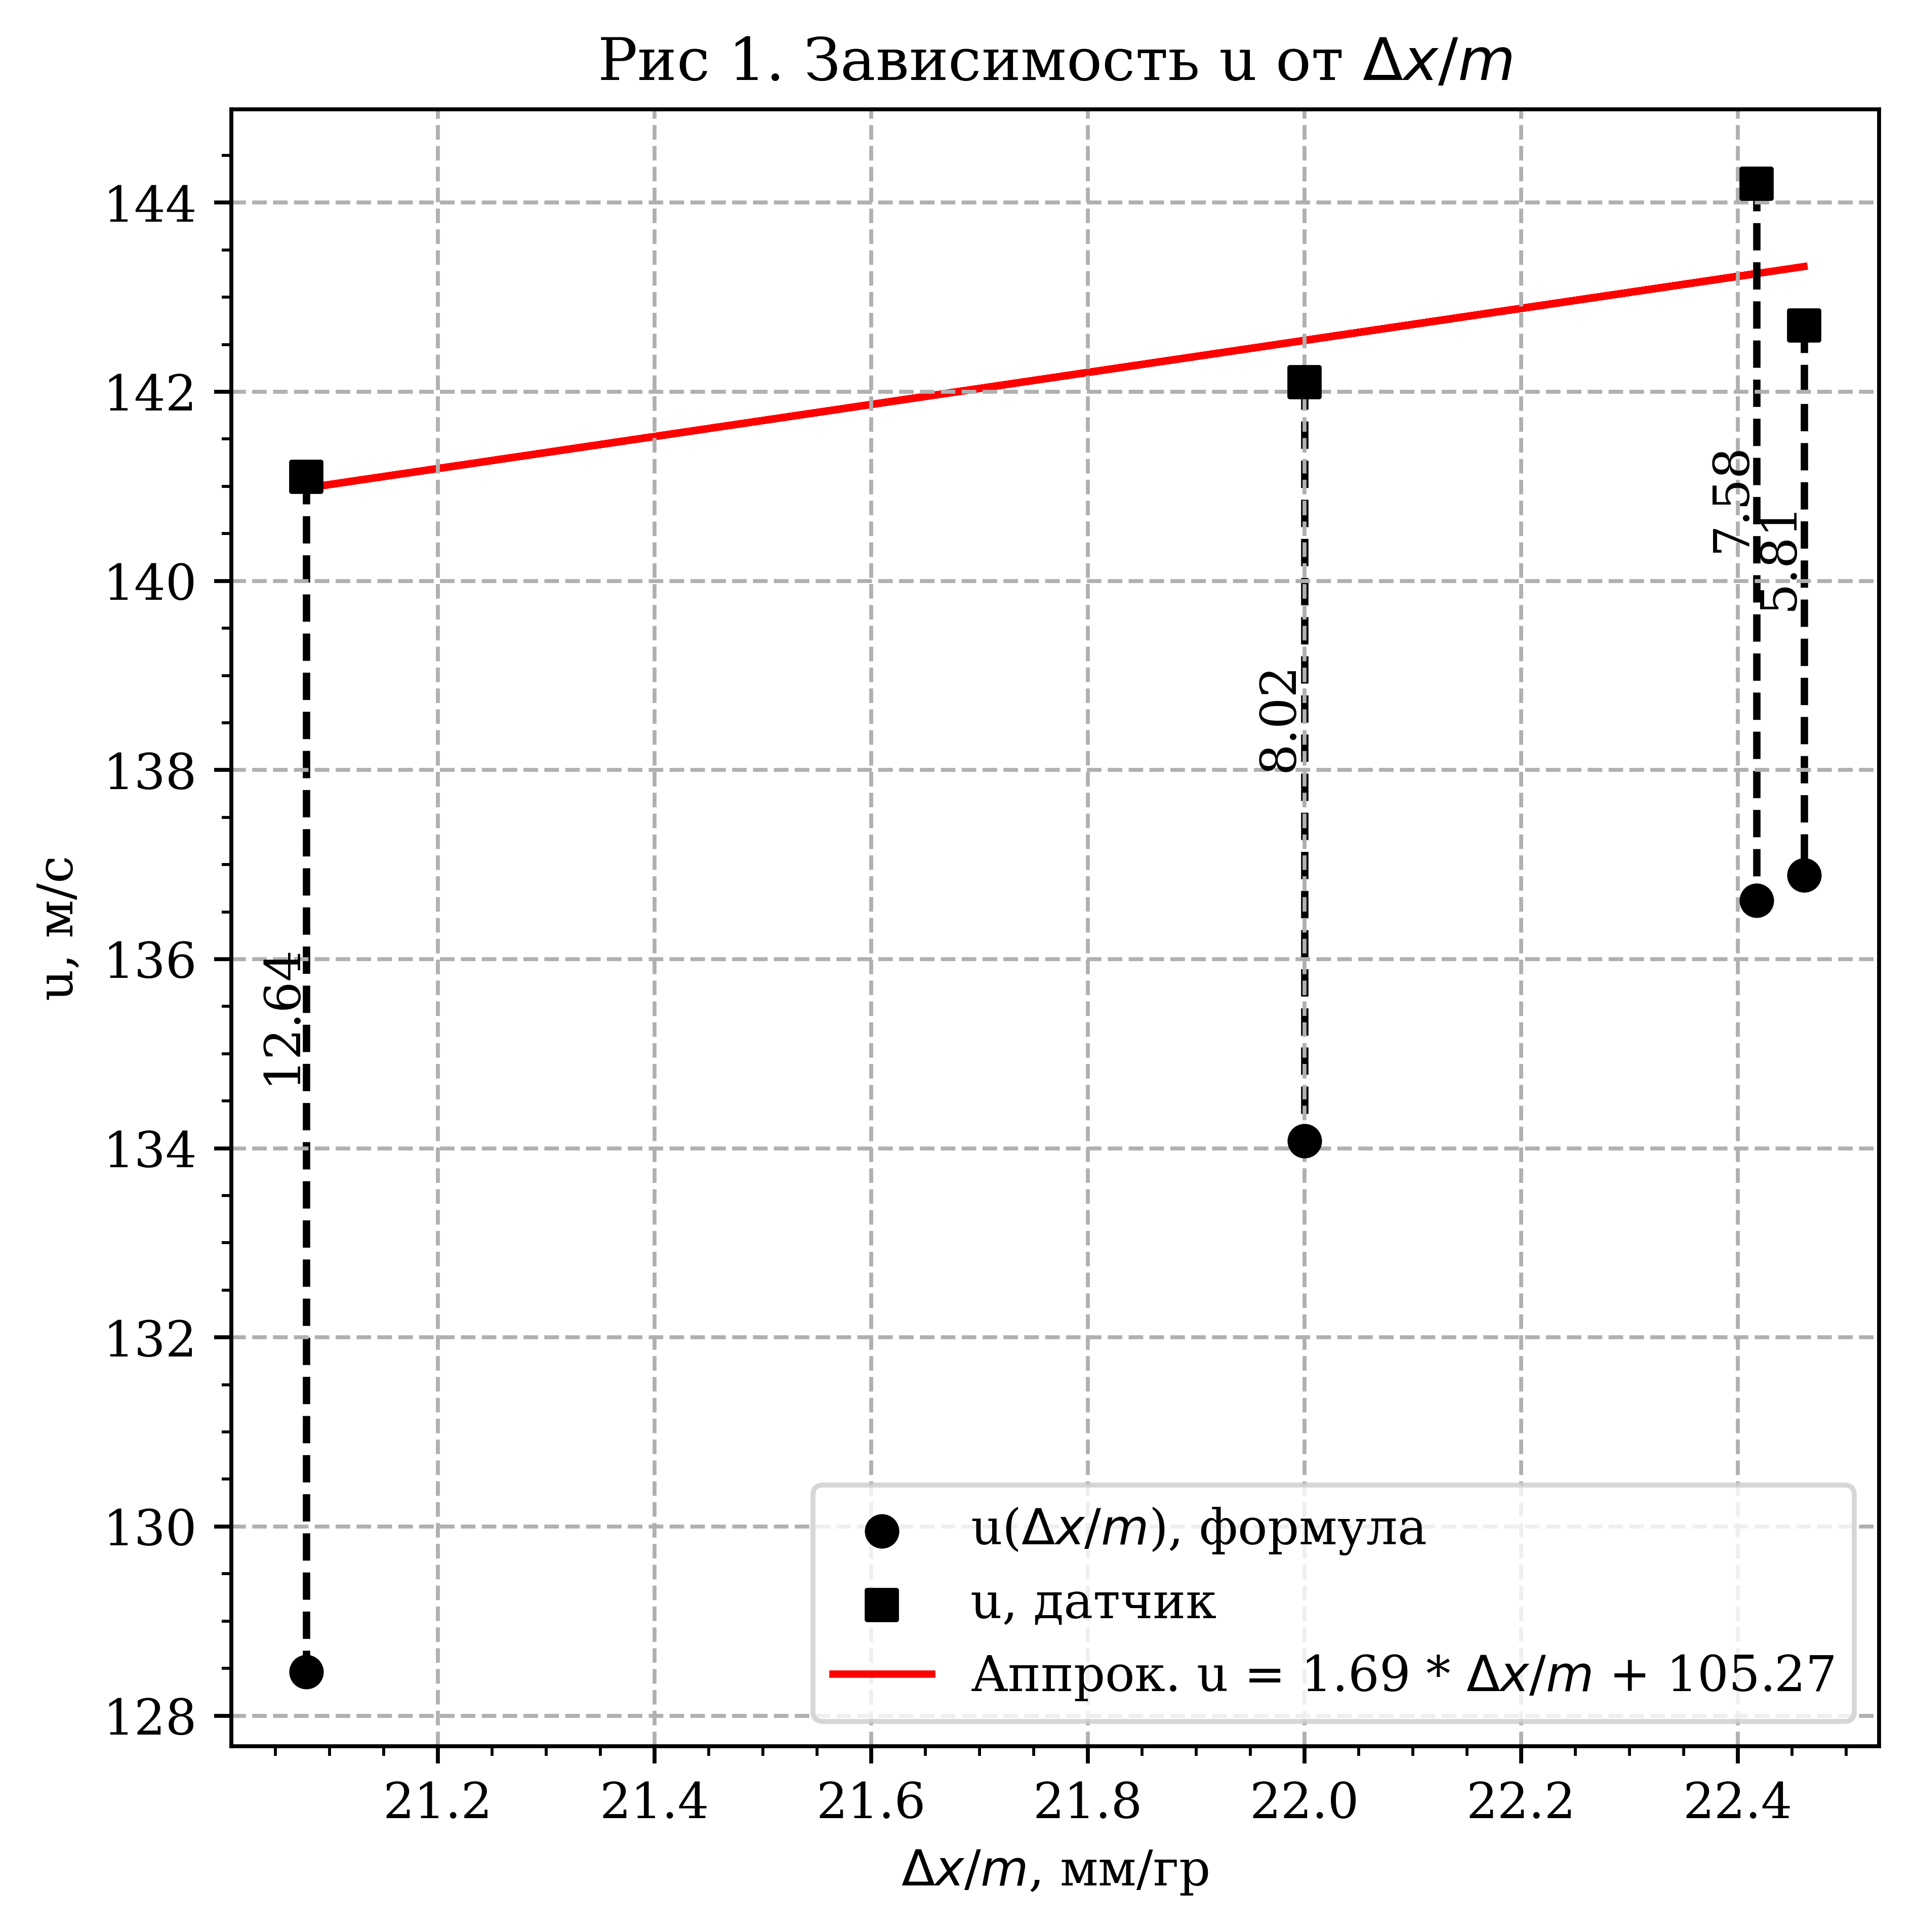

In [80]:
fig, ax = plt.subplots(figsize=(6,6), dpi=700)

ax.grid(which='major', linestyle='--')
rcParams['font.family'] = 'DejaVu Serif'
ax.minorticks_on()

g = 9.815
L = 223 / 1e2
M = 2905 / 1e3
def u(mass, delta_x):
    mass /= 1e3
    delta_x /= 1e3
    return (M / mass) * delta_x * np.sqrt(g / L)

masses =   [0.500, 0.513, 0.510, 0.512]
delta_xs = [11, 11.5, 10.75, 11.5]
us = [ u(mass, delta_x) for mass, delta_x in zip(masses, delta_xs) ]
    
print(f'Скорости пуль баллистического маятника: {us}')

ax.set_title('Рис 1. Зависимость u от $\Delta x / m$')
ax.set_xlabel('$\Delta x / m$, мм/гр')
ax.set_ylabel('u, м/с')

Y_formula = np.array(us)
Y_sensor  = np.array( [142.1, 144.2, 141.1, 142.7] )
X = np.array([delta_x / m for delta_x, m in zip(delta_xs, masses)])

ax.scatter(X, Y_formula, zorder=2, color='k', label='u($\Delta x / m$), формула')
ax.scatter(X, Y_sensor, zorder=2, color='k', marker='s', label='u, датчик')
(k, b) = np.polyfit(X, Y_sensor, 1)
ax.plot(X, k * X + b, color='r', zorder=1, label=f'Аппрок. u = {k:.2f} * $\Delta x / m$ + {b:.2f}')

ax.plot((X,X),(Y_sensor, Y_formula), c='black', linestyle='--', zorder=1)

for i in range(len(X)):
    Y_i = (Y_sensor[i] + Y_formula[i]) / 2
    X_i = X[i] - 0.045
    diff_i = Y_sensor[i] - Y_formula[i]
    ax.text(X_i, Y_i, f'{diff_i:.2f}', color='k', rotation=90)

ax.legend(loc='lower right')

M_sus = k * np.sqrt(L / g)
L_sus = np.square(M) * g / np.square(k)
g_sus = L * np.square(k) / np.square(M)
print('Если считать, что k = M * sqrt(g / L), то:')
print(f'M = {M_sus:.3f}, L = {L_sus:.3f}, g = {g_sus:.3f}')

Скорости пуль крутильного маятника: [138.22318529279906, 173.68298497343542, 143.75906878848468, 139.38146420361178]


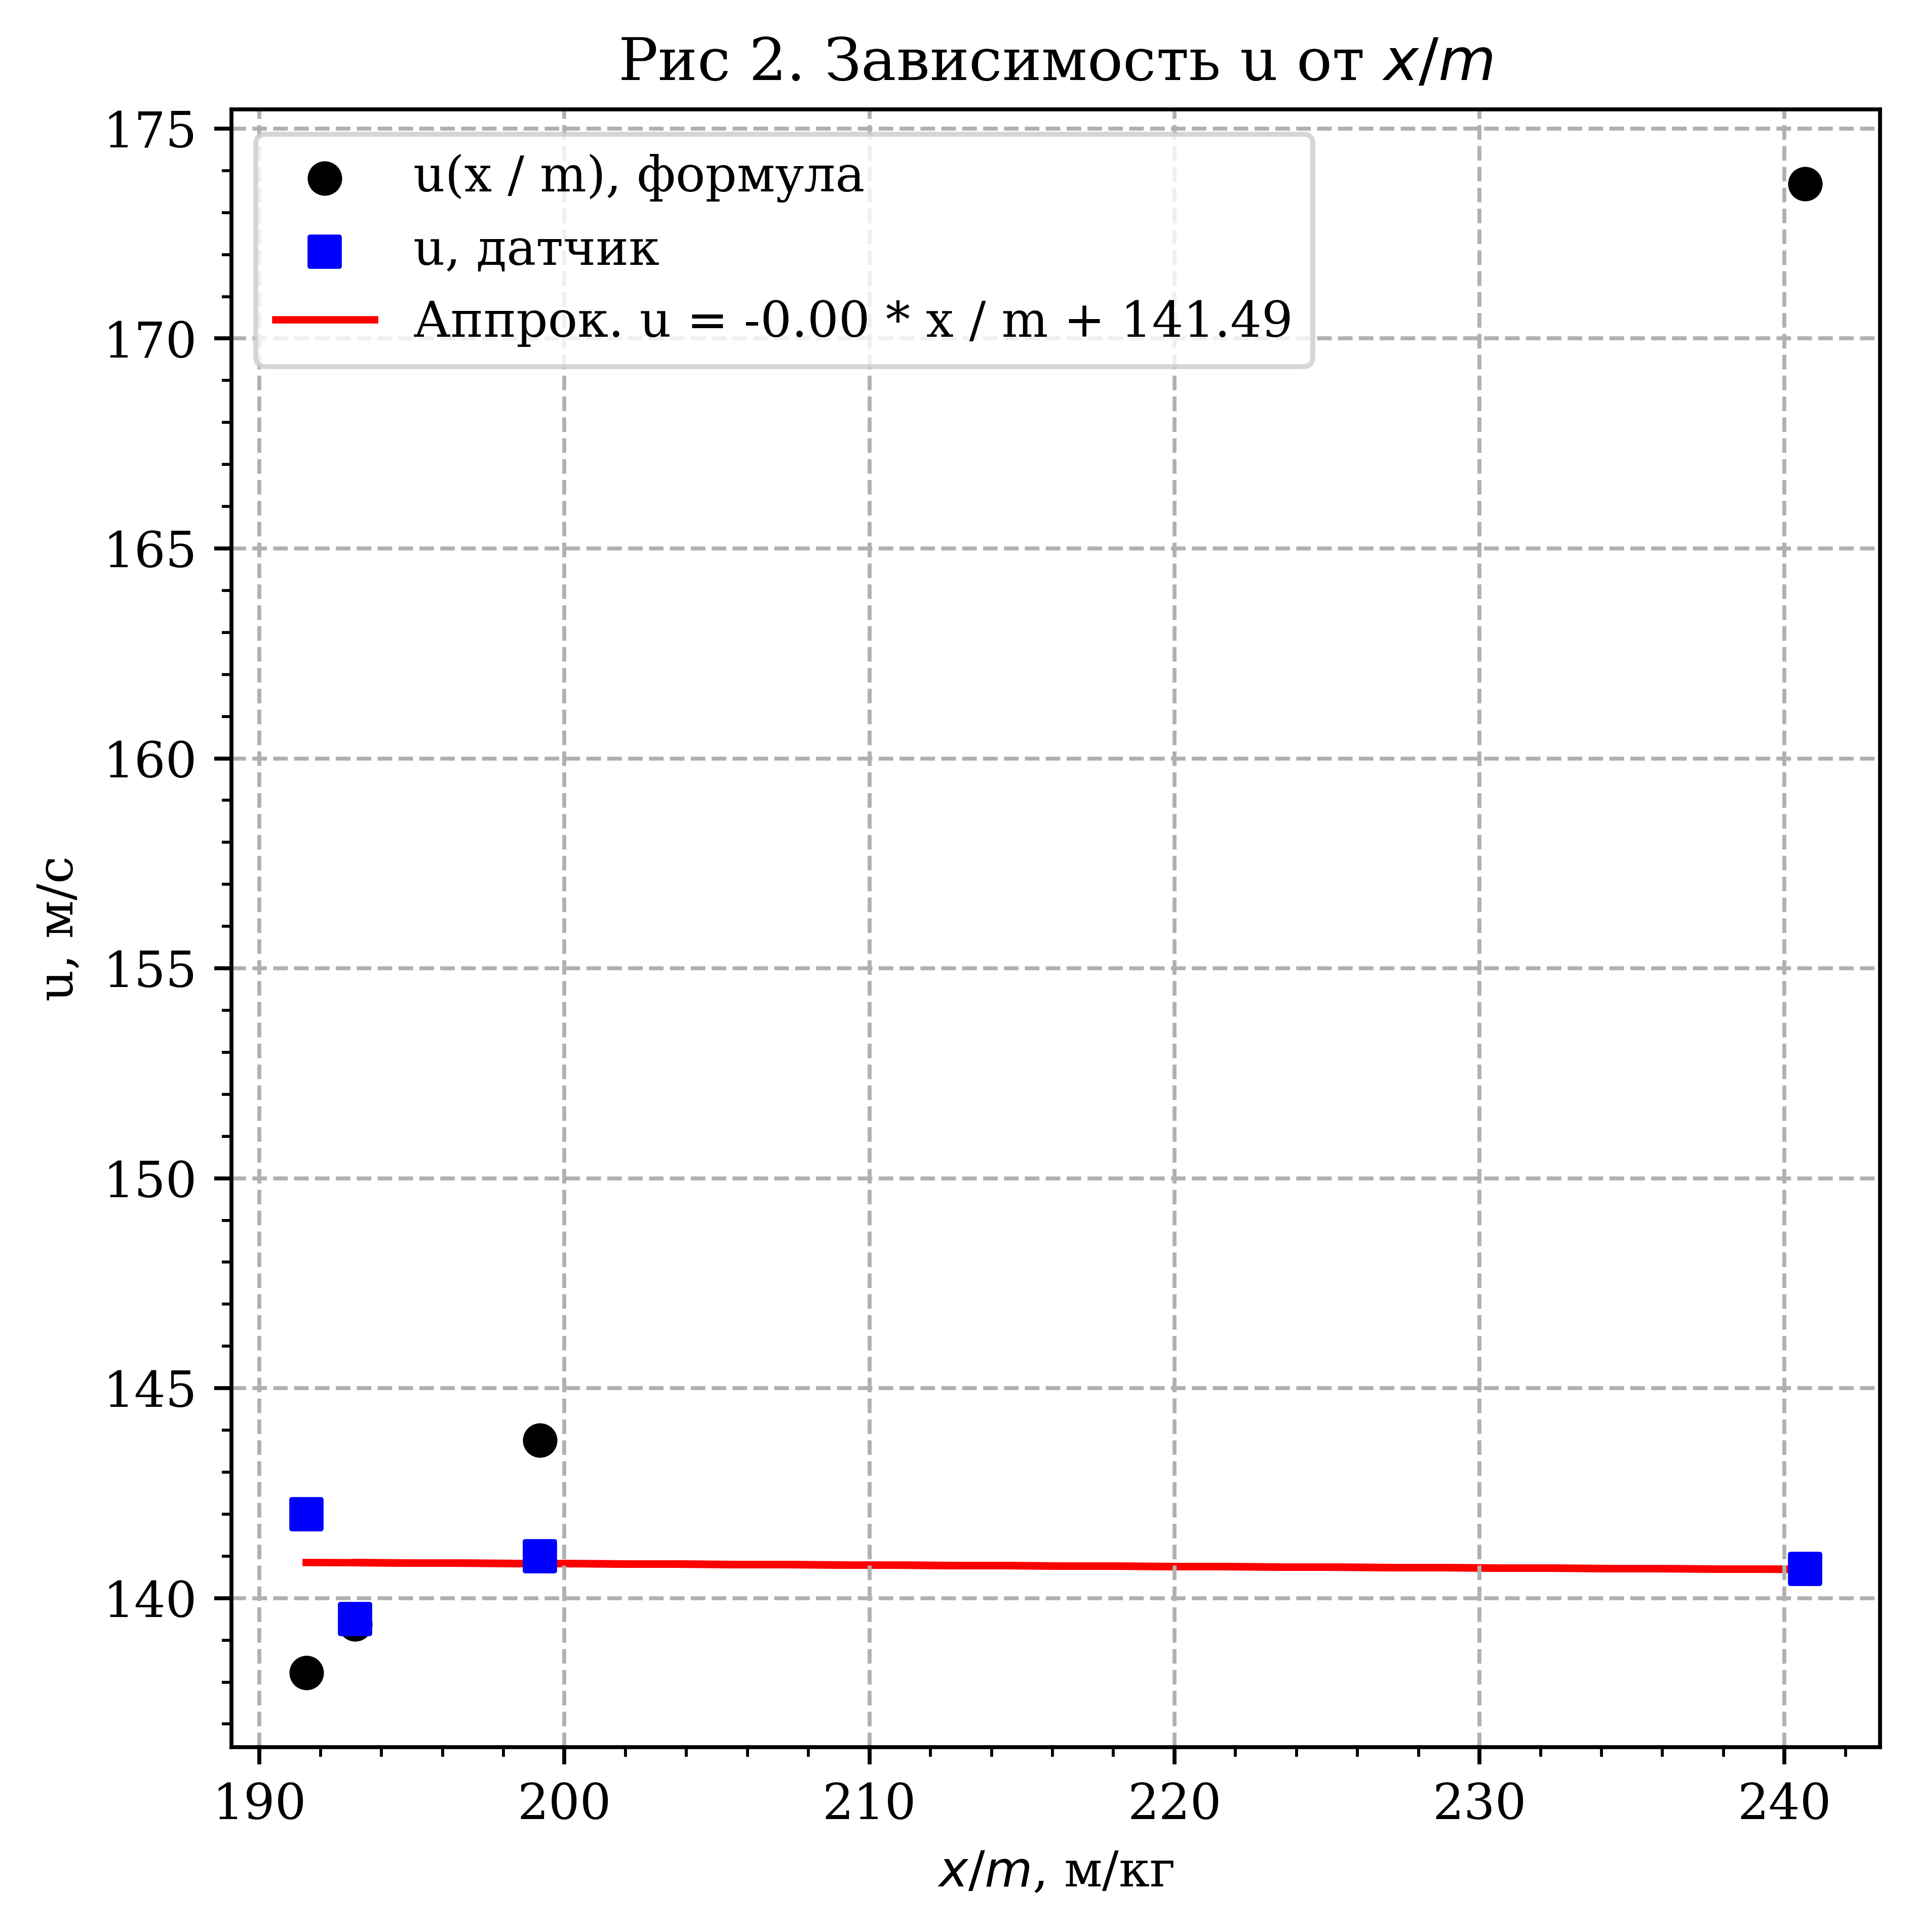

In [73]:
fig, ax = fig, ax = plt.subplots(figsize=(6,6), dpi=700)

ax.grid(which='major', linestyle='--')
rcParams['font.family'] = 'DejaVu Serif'
ax.minorticks_on()

g = 9.815
d = 59.8 / 1e2
R = 32.5 / 1e2
r = 22 / 1e2

t1, t2 = 121.91, 92.94
T1, T2 = t1 / 10, t2 / 10  # 10 = N
M1, M2 = 730.3 / 1e3, 730.5 / 1e3
kI_sqrt = 2 * np.pi * (M1 + M2) * np.square(R) * T1 / (np.square(T1) - np.square(T2))

def u(mass, x):
    mass /= 1e3
    x /= 1e2
    return x * kI_sqrt / (2 * d * mass * r)

masses = [0.496, 0.509, 0.502, 0.510]
xs = [9.5, 12.25, 10, 9.85]
us = [ u(m, x) for m, x in zip(masses, xs) ]
print(f'Скорости пуль крутильного маятника: {us}')

ax.set_title('Рис 2. Зависимость u от $x / m$')
ax.set_xlabel('$x / m$, м/кг')
ax.set_ylabel('u, м/с')

X = np.array([(x / 1e2) / (m / 1e3) for x, m in zip(xs, masses)])
Y_formula = np.array(us)
Y_sensor  = [142.0, 140.7, 141.0, 139.5]

ax.scatter(X, Y_formula, zorder=2, color='k', label='u(x / m), формула')
ax.scatter(X, Y_sensor, zorder=2, color='b', marker='s', label='u, датчик')
(k, b) = np.polyfit(X, Y_sensor, 1)
ax.plot(X, k * X + b, color='r', zorder=1, label=f'Аппрок. u = {k:.2f} * x / m + {b:.2f}')

ax.legend(loc='best')